In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.offline as plt
import plotly.graph_objs as go

In [74]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/My Drive/datasets/apndcts.csv'
df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,At1,At2,At3,At4,At5,At6,At7,class
0,0.213,0.554,0.207,0.000,0.000,0.749,0.220,1
1,0.458,0.714,0.468,0.111,0.102,0.741,0.436,1
2,0.102,0.518,0.111,0.056,0.022,0.506,0.086,1
3,0.187,0.196,0.105,0.056,0.029,0.133,0.085,1
4,0.236,0.804,0.289,0.111,0.066,0.756,0.241,1


In [75]:
df.shape

(106, 8)

In [76]:
X = df.iloc[:, :4].values
y = df['class'].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
knn.score(X_test, y_test)

0.7727272727272727

In [81]:
knn.predict(X_test[20].reshape(1,-1))

array([0])

In [82]:
prediction = []
for i in range(20):
  p = knn.predict(X_test[i].reshape(1,-1))
  prediction.append(p[0])

In [83]:
(y_test[:20] == prediction).sum()/len(prediction)

0.8

In [84]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  2],
       [ 3,  3]])

Text(42.0, 0.5, 'Truth')

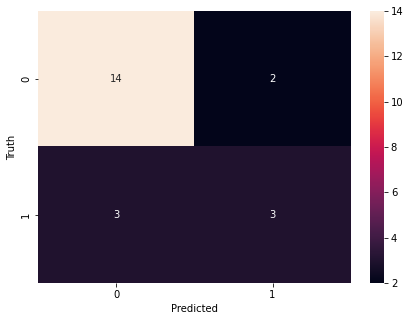

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')